In [2]:
import pandas as pd

order_detail = pd.read_csv("order_detail.csv", parse_dates=["order_date"])

order_2022 = order_detail[
    (order_detail["order_date"] >= "2022-01-01") &
    (order_detail["order_date"] <= "2022-12-31")
]
monthly_sales = order_2022.resample("ME", on="order_date")["qty_ordered"].sum().reset_index()
monthly_sales.columns = ["month", "total_qty"]

print(monthly_sales)


        month  total_qty
0  2022-01-31        769
1  2022-02-28        610
2  2022-03-31        834
3  2022-04-30       1127
4  2022-05-31        659
5  2022-06-30        735
6  2022-07-31        570
7  2022-08-31       1228
8  2022-09-30       1172
9  2022-10-31        157
10 2022-11-30        182
11 2022-12-31        158


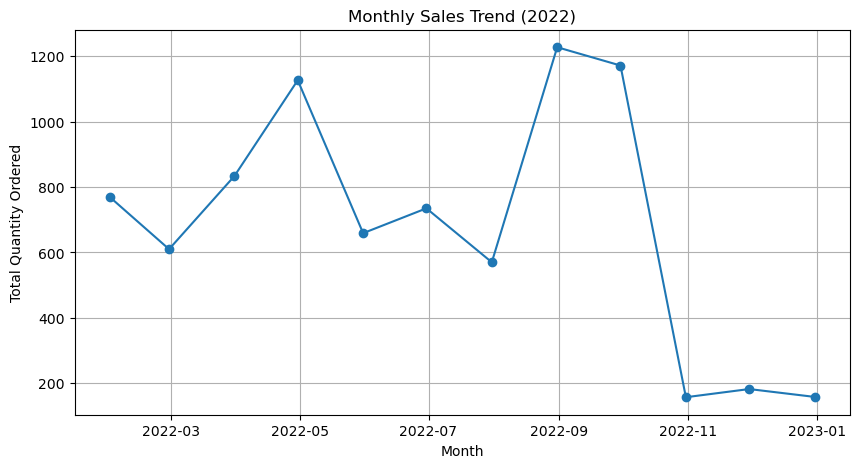

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales["month"], monthly_sales["total_qty"], marker='o')
plt.title("Monthly Sales Trend (2022)")
plt.xlabel("Month")
plt.ylabel("Total Quantity Ordered")
plt.grid(True)
plt.show()


In [6]:
monthly_sales.index.freq = 'ME'

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales["total_qty"], order=(1, 1, 1))
model_fit = model.fit()

forecast = model_fit.forecast(steps=3)
forecast.index = pd.date_range(start="2023-04-01", periods=3, freq="MS")

print(forecast)


2023-04-01    405.905805
2023-05-01    526.760693
2023-06-01    585.677845
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\shubh\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

actual_q1 = [1000, 1100, 980]         
predicted_q1 = model_fit.forecast(steps=3)[:3]

mae = mean_absolute_error(actual_q1, predicted_q1)
rmse = np.sqrt(mean_squared_error(actual_q1, predicted_q1))

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")


MAE: 520.55, RMSE: 528.22


In [8]:
monthly_sales.reset_index(inplace=True)
monthly_sales["type"] = "Actual"

forecast_df = forecast.reset_index()
forecast_df.columns = ["month", "total_qty"]
forecast_df["type"] = "Predicted"

combined_df = pd.concat([monthly_sales, forecast_df], ignore_index=True)

combined_df.to_csv("sales_prediction.csv", index=False)
print(combined_df)


        month    total_qty       type
0  2022-01-31   769.000000     Actual
1  2022-02-28   610.000000     Actual
2  2022-03-31   834.000000     Actual
3  2022-04-30  1127.000000     Actual
4  2022-05-31   659.000000     Actual
5  2022-06-30   735.000000     Actual
6  2022-07-31   570.000000     Actual
7  2022-08-31  1228.000000     Actual
8  2022-09-30  1172.000000     Actual
9  2022-10-31   157.000000     Actual
10 2022-11-30   182.000000     Actual
11 2022-12-31   158.000000     Actual
12 2023-04-01   405.905805  Predicted
13 2023-05-01   526.760693  Predicted
14 2023-06-01   585.677845  Predicted
